In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

#Ans 1



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
Insurance_Data= pd.read_csv('/content/drive/MyDrive/Data Science/Data Mining/Project/insurance_part2_data.csv')

In [ ]:
Insurance_Data.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [ ]:
Insurance_Data.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [ ]:
Insurance_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [ ]:
Insurance_Data['Duration'].unique()

array([   7,   34,    3,    4,   53,    8,   30,   16,   19,   42,  368,
         77,   23,   21,  366,    2,   40,   33,   66,   71,   25,   29,
         31,   36,   70,   11,   27,   32,   20,   90,   17,   14,    5,
         75,   35,   24,   22,  364,   13,   15,    6,   37,  365,   38,
         81,   96,   28,   44,   57,   51,   26,  367,   12,    9,  110,
         58,   65,  100,  186,   39,   48,   46,  266,   72,   61,   43,
         18,  146,   10,   59,   93,   56,   50,   99,  135,  382,   47,
         74,   64,  379,  152,  112,  380,  189,   60,   41,   89,   95,
        383,   62,  374,   55,  401,  145,   80,   83,    1,   52,  114,
         63,   49,   69,   67,  109,  105,   54,   98,  259,  239,  102,
        166,  165,  107,  385,   68,   73,  144,  126,  116,   45,  113,
        111,  378,   82,  187,  394,  147,   88,  175,   87,  402,  393,
        224,  384,  244,  148,  209,  132,  377,  235,   79,  101,  158,
        120,  376,  125,  386,  162,  375,   76,  1

In [ ]:
##There is a value present as -1 in Duration which is not possible, so I am replacing the value with the median value that is 26.5
Insurance_Data['Duration'] = Insurance_Data['Duration'].replace(to_replace=-1,value=26.5)

In [ ]:
Insurance_Data['Duration'].describe()

count    3000.000000
mean       70.010500
std       134.049397
min         0.000000
25%        11.000000
50%        26.750000
75%        63.000000
max      4580.000000
Name: Duration, dtype: float64

In [ ]:
dups = Insurance_Data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Insurance_Data[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27.0,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5.0,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11.0,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2.0,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5.0,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8.0,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10.0,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2.0,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4.0,20.0,Customised Plan,ASIA


In [ ]:
Insurance_Data.drop_duplicates(inplace=True)

In [ ]:
dups = Insurance_Data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Insurance_Data[dups]

Number of duplicate rows = 0


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination


In [ ]:
Insurance_Data.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

##Ans 1.1

###Univariate Analysis

###Numerical Variables

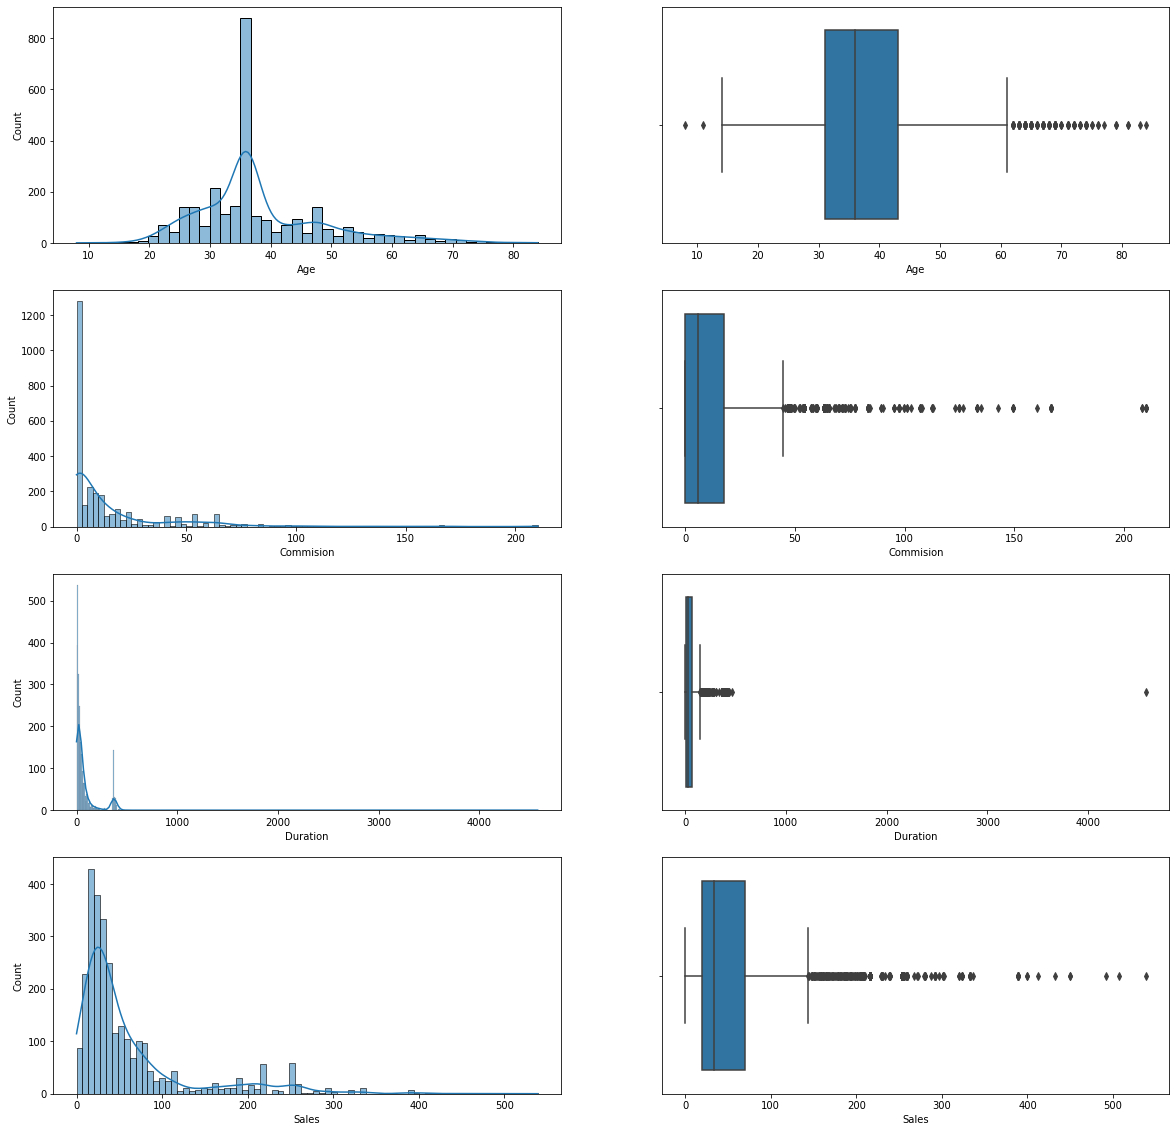

In [ ]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20,20)
sns.histplot(Insurance_Data['Age'], kde=True, ax=axes[0][0])
sns.boxplot(x='Age', data=Insurance_Data, ax=axes[0][1])
sns.histplot(Insurance_Data['Commision'] , kde=True, ax=axes[1][0])
sns.boxplot(x='Commision', data=Insurance_Data , ax=axes[1][1])
sns.histplot(Insurance_Data['Duration'] , kde=True, ax=axes[2][0])
sns.boxplot(x='Duration', data=Insurance_Data , ax=axes[2][1])
sns.histplot(Insurance_Data['Sales'], kde=True, ax=axes[3][0])
sns.boxplot(x='Sales', data=Insurance_Data, ax=axes[3][1])
plt.show()

###From the above analyis of numerical variable I can see that for

*   Age - Data is positively skewed. The mean is little higher than median here. The mean is 38.09 and median value is 36 here. The age of insured people ranges from 8 to 84. Outliers are present.
*   Commission- Data is positively skewed. The mean is much higher than median. Here the mean value is 14.53 and median is 4.63. The minimum commission received for tour insurance firm is 0 and the maximum commission received for tour insurance firm is 212.21. Outliers are present.
*   Duration - The mean value is very much higher than median here. So the data distribution is positively skewed. The mean is 70.01 here and median is 26.75. The minimum duration of the tour is 0 and the maximum duration of the tour is 4580 days. Outliers are present.
*   Sales - The mean is being higher than median so the data is positively skewed. The mean is 60.25 and the median is 33. Outliers are present. The minimum amount worth of sales per customer in procuring tour insurance policies is 0 and the maximum amount worth of sales per customer in procuring tour insurance policiesis  639. Outliers are present.





###Categorical Variables

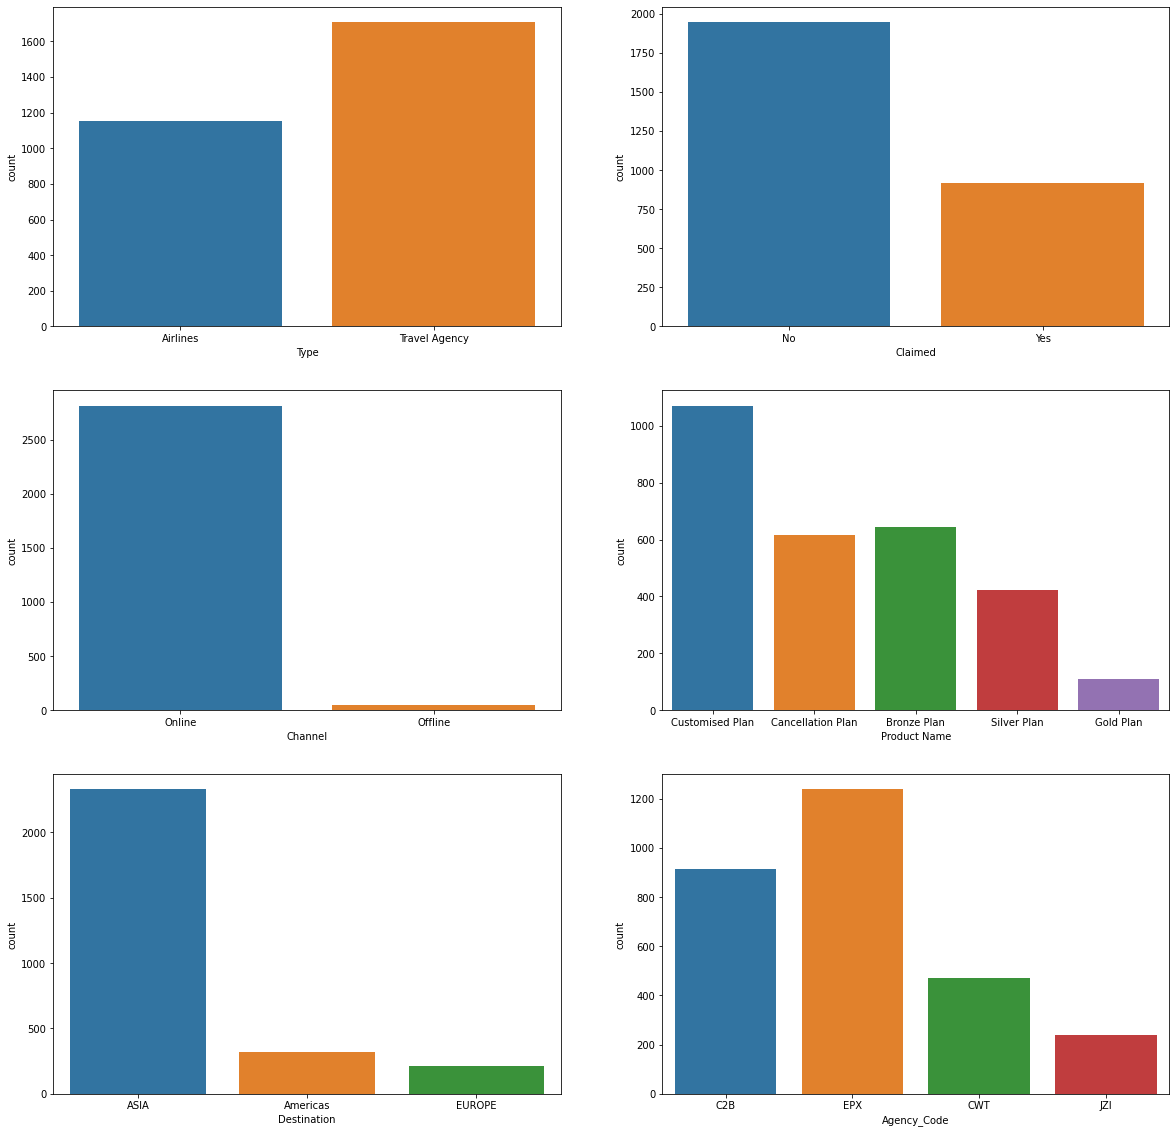

In [ ]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(20,20)
sns.countplot(x='Type', data=Insurance_Data, ax=axes[0][0])
sns.countplot(x='Claimed', data=Insurance_Data, ax=axes[0][1])
sns.countplot(x='Channel', data=Insurance_Data, ax=axes[1][0])
sns.countplot(x='Product Name', data=Insurance_Data, ax=axes[1][1])
sns.countplot(x='Destination', data=Insurance_Data, ax=axes[2][0])
sns.countplot(x='Agency_Code', data=Insurance_Data, ax=axes[2][1])
plt.show()

###From the visualization of categorical variables I can see that for

*   Type - In the type of tour insurance firms two categories are present i.e., Airlines and Travel agencies. And the concentration of 'Travel agencies' is more than Airlines.
*   Claimed - In the last few years the customers, who had not got the claimed status, are more in numbers than the clamied ones.
*   Channel - Most of the insurances are distributed through online.
*   Product Name - There are 5 different products as products for tour insurance. Customers mostly preferred the 'Customized Plan' and least preferred 'Gold Plan'.
*   Destination - As the destination of the tour most of the customers preferred Asia followed by Americas and Europe.
*   Agency_Code - There are 4 kinds of agency code. Customers have preferred the agency with code EPX the most and they have preferred the aganecy with code JZI the least.




###Bivariate Analysis

In [ ]:
pd.crosstab(Insurance_Data['Type'], Insurance_Data['Channel'])

Channel,Offline,Online
Type,,
Airlines,0,1152
Travel Agency,46,1663


###From the above analysis I can see that no customer has choosen Airlines in offline mode. All of the customers of Airlines preferred online. Customers who have chosen Travel Agency in offline mode is also very less in numbers compared to online.

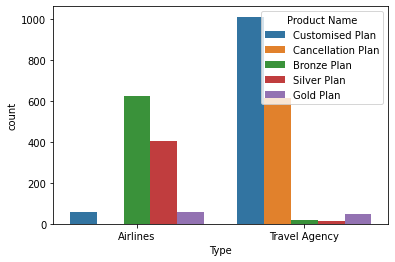

In [ ]:
sns.countplot(x='Type', hue='Product Name', data=Insurance_Data)
plt.show()

###From the above plot I can analyse that for the type of Travel Agency insurance most of the customers have chosen Customized plan and least number of customers have chosen Silver Plan. And for Airlines, most of the customers have chosen Bronze plan and least in Gold plan. There are no cancellation plan in Airlines.

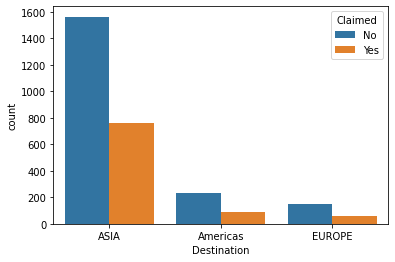

In [ ]:
sns.countplot(x='Destination', hue='Claimed', data=Insurance_Data)
plt.show()

###From the above analysis I can see that most of the customers were not claimed irrespective of the destination they visited.

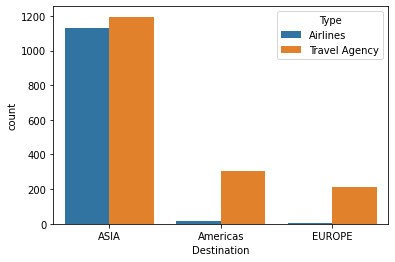

In [ ]:
sns.countplot(x='Destination', hue='Type', data=Insurance_Data)
plt.show()

###In this visualization I can see that for destination ASIA customers have chosen both the insurance firms in adequate numbers while for both Americas and EUROPE Customers have trusted 'Travel Agency' more to get the insurance.

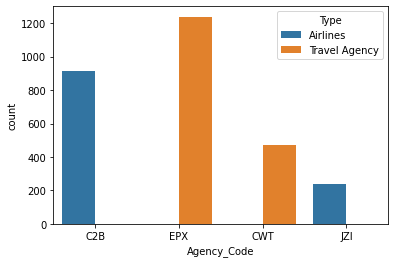

In [ ]:
sns.countplot(x='Agency_Code', hue='Type', data=Insurance_Data)
plt.show()

###From the above plot I can see that agency codes C2B and JZI belong to Airlines and EPX and CWT are agency codes for Travel agency.

In [ ]:
pd.crosstab(Insurance_Data['Claimed'], Insurance_Data['Agency_Code'])

Agency_Code,C2B,CWT,EPX,JZI
Claimed,,,,
No,361,331,1046,209
Yes,552,140,192,30


###From the above table I can see the number of different claim statuses in different agency codes. I can state that agency code EPX having most number of claim statuses as 'NO' while agency code C2B having most number of claim statuses as 'YES'.

###Multivariate Analysis

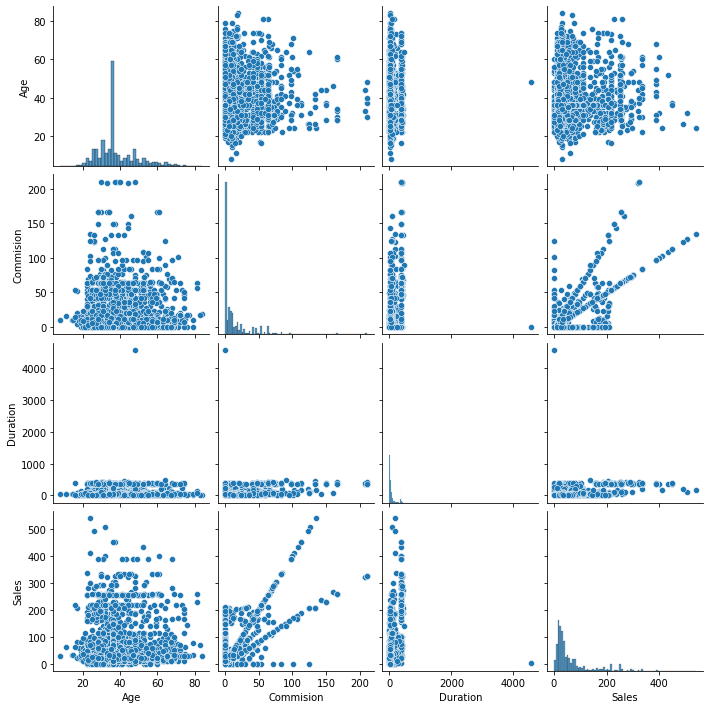

In [ ]:
sns.pairplot(Insurance_Data)
plt.show()

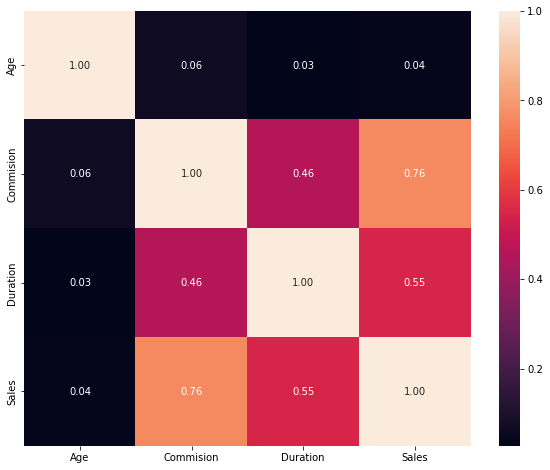

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(Insurance_Data.corr(),annot=True,fmt=".2f");

###From the above visualizations using pair plot and heatmap also I can clearly see that there is hardly any correlation present among the variables.

##Ans 1.2

In [ ]:
# Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types. 
# The following code loops through each column and checks if the column type is object then converts those columns 
# into categorical with each distinct value becoming a category or code.

for feature in Insurance_Data.columns: 
    if Insurance_Data[feature].dtype == 'object': 
        Insurance_Data[feature] = pd.Categorical(Insurance_Data[feature]).codes

In [ ]:
Insurance_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   float64
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(3), int64(1), int8(6)
memory usage: 193.1 KB


In [ ]:
#Extracting the target column into separate vectors for training set and test set
X = Insurance_Data.drop("Claimed" , axis=1)

y = Insurance_Data.pop("Claimed")

In [ ]:
#Splitting data into training and test set

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

###Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [ ]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [ ]:
from sklearn import tree

train_char_label = ['No', 'Yes']
IN_Tree_File = open('/content/drive/MyDrive/Data Science/Data Mining/Project/insurance_part2_data.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=IN_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7, 8, 9, 10],
    'min_samples_leaf': [15, 20, 25],
    'min_samples_split': [45, 60, 75]
}

dt_model = DecisionTreeClassifier(random_state = 0)

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)

In [ ]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [7, 8, 9, 10],
                         'min_samples_leaf': [15, 20, 25],
                         'min_samples_split': [45, 60, 75]})

In [ ]:
grid_search.best_params_

{'max_depth': 8, 'min_samples_leaf': 20, 'min_samples_split': 45}

In [ ]:
best_grid = grid_search.best_estimator_

In [ ]:
ytrain_predict_dt = best_grid.predict(X_train)
ytest_predict_dt = best_grid.predict(X_test)

### Random Forest

In [ ]:
param_grid = {
    'max_depth': [7, 8],
    'min_samples_leaf': [20, 25],
    'min_samples_split': [60, 75],
    'n_estimators': [101, 301]
}

RF = RandomForestClassifier(random_state = 0)

grid_search_1 = GridSearchCV(estimator = RF, param_grid = param_grid, cv = 3)

In [ ]:
grid_search_1.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [7, 8], 'min_samples_leaf': [20, 25],
                         'min_samples_split': [60, 75],
                         'n_estimators': [101, 301]})

In [ ]:
grid_search_1.best_params_

{'max_depth': 8,
 'min_samples_leaf': 20,
 'min_samples_split': 75,
 'n_estimators': 101}

In [ ]:
best_grid_RF = grid_search_1.best_estimator_

In [ ]:
ytrain_predict_RF = best_grid_RF.predict(X_train)
ytest_predict_RF = best_grid_RF.predict(X_test)

### Artificial Neural Network

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform(X_test)

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(100,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.01,0.001],
    'max_iter' : [500]
}

ANN = MLPClassifier(random_state = 0)

grid_search_2 = GridSearchCV(estimator = ANN, param_grid = param_grid, cv = 3)

In [ ]:
grid_search_2.fit(X_trains, train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=0),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(100, 100)], 'max_iter': [500],
                         'solver': ['sgd', 'adam'], 'tol': [0.01, 0.001]})

In [ ]:
grid_search_2.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100, 100),
 'max_iter': 500,
 'solver': 'adam',
 'tol': 0.01}

In [ ]:
best_grid_nn = grid_search_2.best_estimator_

In [ ]:
ytrain_predict_NN = best_grid_nn.predict(X_trains)
ytest_predict_NN = best_grid_nn.predict(X_tests)

###Grid-search is used to find the optimal hyperparameters of a model which results in the most 'accurate' predictions. That is why I have used Grid Search here GridSearch to find the best model very easily.

##Ans 1.3

###Performance metrics for Decision Tree Model

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(train_labels, ytrain_predict_dt))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1359
           1       0.70      0.59      0.64       643

    accuracy                           0.79      2002
   macro avg       0.76      0.74      0.75      2002
weighted avg       0.78      0.79      0.78      2002



In [ ]:
print(classification_report(test_labels, ytest_predict_dt))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       588
           1       0.63      0.53      0.58       271

    accuracy                           0.75       859
   macro avg       0.72      0.69      0.70       859
weighted avg       0.75      0.75      0.75       859



In [ ]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.473051
Sales         0.265188
Duration      0.089125
Age           0.067663
Commision     0.059575
Product Name  0.037309
Destination   0.008089
Type          0.000000
Channel       0.000000


In [ ]:
confusion_matrix(train_labels, ytrain_predict_dt)

array([[1199,  160],
       [ 262,  381]])

In [ ]:
confusion_matrix(test_labels, ytest_predict_dt)

array([[504,  84],
       [127, 144]])

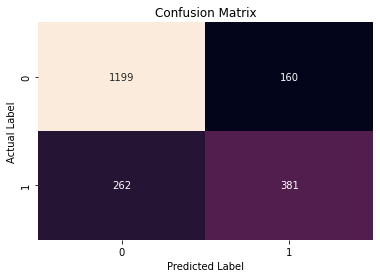

In [ ]:
sns.heatmap(confusion_matrix(train_labels, ytrain_predict_dt),annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

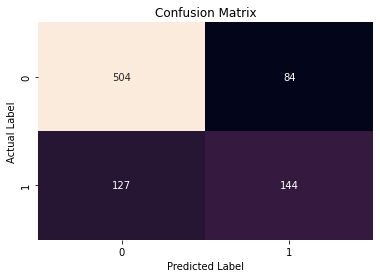

In [ ]:
sns.heatmap(confusion_matrix(test_labels, ytest_predict_dt),annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

AUC: 0.849


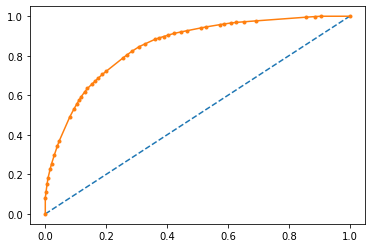

In [ ]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.771


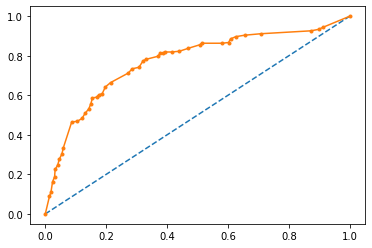

In [ ]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

###Prediction metrics for Random Forest model

In [ ]:
print (pd.DataFrame(best_grid_RF.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.299376
Product Name  0.214719
Sales         0.184238
Commision     0.116619
Duration      0.084162
Type          0.048951
Age           0.041452
Destination   0.010319
Channel       0.000166


In [ ]:
print(classification_report(train_labels,ytrain_predict_RF))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1359
           1       0.73      0.55      0.62       643

    accuracy                           0.79      2002
   macro avg       0.77      0.72      0.74      2002
weighted avg       0.78      0.79      0.78      2002



In [ ]:
print(classification_report(test_labels,ytest_predict_RF))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85       588
           1       0.69      0.53      0.60       271

    accuracy                           0.78       859
   macro avg       0.75      0.71      0.72       859
weighted avg       0.77      0.78      0.77       859



In [ ]:
confusion_matrix(train_labels, ytrain_predict_RF)

array([[1226,  133],
       [ 292,  351]])

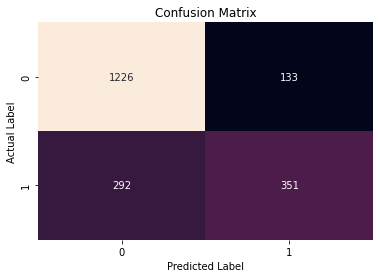

In [ ]:
sns.heatmap(confusion_matrix(train_labels, ytrain_predict_RF),annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
confusion_matrix(test_labels, ytest_predict_RF)

array([[525,  63],
       [128, 143]])

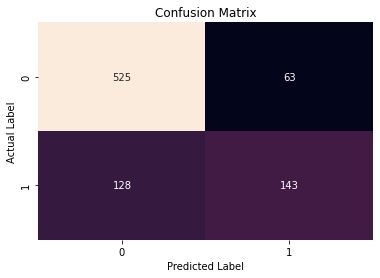

In [ ]:
sns.heatmap(confusion_matrix(test_labels, ytest_predict_RF),annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

AUC: 0.835


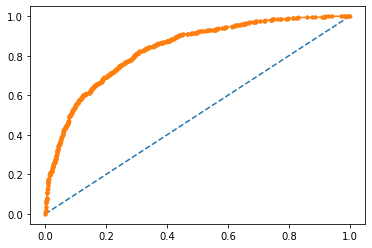

In [ ]:
# predict probabilities
probs = best_grid_RF.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.819


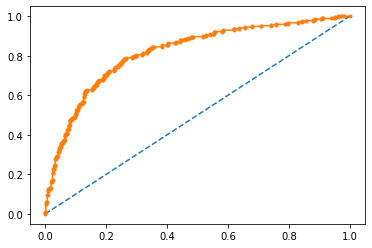

In [ ]:
# predict probabilities
probs = best_grid_RF.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

###Prediction metrics for Artificial Neural Network

In [ ]:
print(classification_report(train_labels,ytrain_predict_NN))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84      1359
           1       0.68      0.51      0.59       643

    accuracy                           0.77      2002
   macro avg       0.74      0.70      0.71      2002
weighted avg       0.76      0.77      0.76      2002



In [ ]:
print(classification_report(test_labels,ytest_predict_NN))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       588
           1       0.69      0.49      0.58       271

    accuracy                           0.77       859
   macro avg       0.74      0.70      0.71       859
weighted avg       0.76      0.77      0.76       859



In [ ]:
confusion_matrix(train_labels, ytrain_predict_NN)

array([[1204,  155],
       [ 313,  330]])

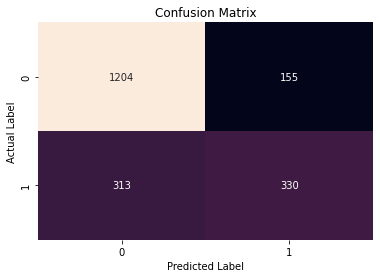

In [ ]:
sns.heatmap(confusion_matrix(train_labels, ytrain_predict_NN),annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
confusion_matrix(test_labels, ytest_predict_NN)

array([[527,  61],
       [137, 134]])

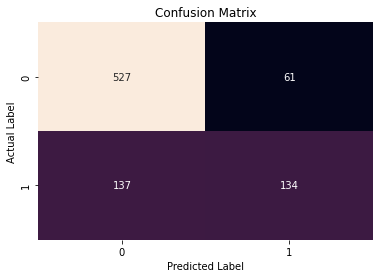

In [ ]:
sns.heatmap(confusion_matrix(test_labels, ytest_predict_NN),annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

AUC: 0.802


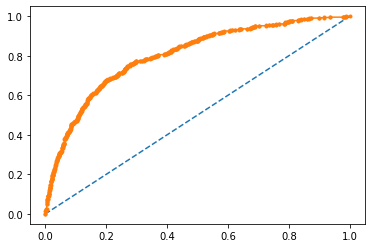

In [ ]:
# predict probabilities
probs = best_grid_nn.predict_proba(X_trains)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.804


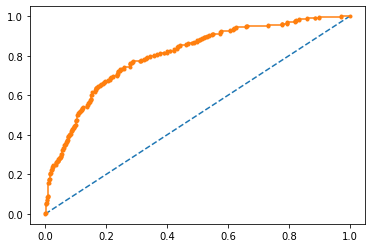

In [ ]:
# predict probabilities
probs = best_grid_nn.predict_proba(X_tests)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

##Ans 1.4

In [ ]:
#If I compare all the models based on the prediction metrics

index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[0.79, 0.849, 0.59, 0.70, 0.64],
        'CART Test':[0.75, 0.771, 0.53, 0.63, 0.58],
       'Random Forest Train':[0.79, 0.835, 0.55, 0.73, 0.62],
        'Random Forest Test':[0.78, 0.819, 0.53, 0.69, 0.60],
       'Neural Network Train':[0.77, 0.802, 0.51, 0.68, 0.59],
        'Neural Network Test':[0.77, 0.804, 0.49, 0.69, 0.58]}, index=index)

In [ ]:
data

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.790,0.750,0.790,0.780,0.770,0.770
AUC,0.849,0.771,0.835,0.819,0.802,0.804
Recall,0.590,0.530,0.550,0.530,0.510,0.490
Precision,0.700,0.630,0.730,0.690,0.680,0.690
F1 Score,0.640,0.580,0.620,0.600,0.590,0.580


###After overall analysis I am selecting Random Forest model as it has better accuracy, precision, recall, f1 score than both of Decision tree and Artificial neural network model.

##Ans 1.5

###I strongly recommend to collect more real time unstructured data and past data if possible.

###After analysing and looking at the insurance data by drawing relations between different variables I can see that - 

* Streamlining online experiences benefited customers leading to an increase in conversions, which subsequently raised profits. 
* As per the data 90% of insurance is done by online channel. 
* Other interesting fact, is almost all the offline business has a claimed associated, need to find why? 
* Need to train the JZI agency resources to pick up sales as they are in bottom, need to run promotional marketing campaign or evaluate if we need to tie up with alternate agency 
* Also based on the model we are getting 80% accuracy, so we need customer books airline tickets or plans, cross sell the insurance based on the claim data pattern. 
* Other interesting fact is more sales happened via Travel Agency than Airlines and the trend shows that the claims are processed more at Airline. So we may need to deep dive into the process to understand the workflow.